In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [185]:
df=pd.read_csv('cars_price.csv')
df

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN


In [186]:
df.columns
df=df.drop('Unnamed: 0',axis=1)
df

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN


Text(0.5, 1.0, 'Mileage Vs Price(USD)')

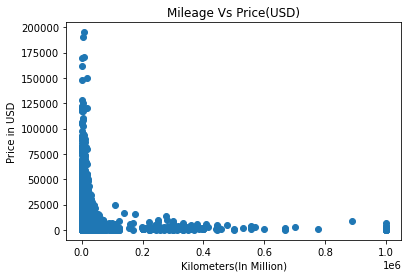

In [187]:
plt.scatter((df['mileage(kilometers)'])/10,df['priceUSD'])
plt.xlabel("Kilometers(In Million)")
plt.ylabel('Price in USD')
plt.title('Mileage Vs Price(USD)')
#It is evident from the plot that the price is inversely proportional to the mileage .

Text(0.5, 1.0, 'Year Vs Price(USD)')

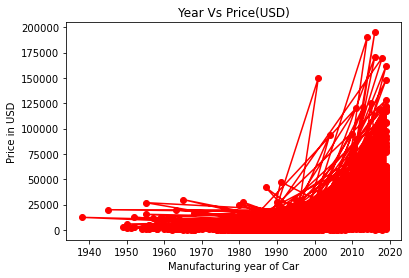

In [188]:
plt.plot((df['year']),df['priceUSD'],'-o',color='red')
plt.xlabel("Manufacturing year of Car")
plt.ylabel('Price in USD')
plt.title('Year Vs Price(USD)')
#It is evident from the plot that newer the vehicle higher is the price i.e the price is directly proportional to the year

Text(0.5, 1.0, 'Segment Vs Price(USD)')

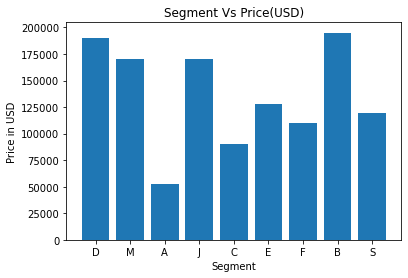

In [189]:

df['segment']=df['segment'].replace(np.nan,None)
df['segment'].unique()
plt.bar((df['segment']),df['priceUSD'])
plt.xlabel("Segment")
plt.ylabel('Price in USD')
plt.title('Segment Vs Price(USD)')
#Segment Vs USD

In [190]:
df.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment'],
      dtype='object')

In [191]:

# X=df[cols_to_keep]
# Y=df['priceUSD']
# X['make']
df['condition'].unique()

array(['with mileage', 'with damage', 'for parts'], dtype=object)

In [192]:
#Encoding the categorical column make
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["make_code"] = lb_make.fit_transform(df["make"])
df[["make", "make_code"]].head(11)


,make,make_code
0,honda,32
1,ford,24
2,nissan,58
3,volkswagen,87
4,nissan,58
5,nissan,58
6,mitsubishi,56
7,volkswagen,87
8,volkswagen,87
9,renault,68


In [193]:
#Encoding the categorical column condition
lb_con = LabelEncoder()
df["condition_code"] = lb_con.fit_transform(df["condition"])
df[["condition", "condition_code"]].head(11)


,condition,condition_code
0,with mileage,2
1,with mileage,2
2,with mileage,2
3,with mileage,2
4,with damage,1
5,with mileage,2
6,with mileage,2
7,with mileage,2
8,with mileage,2
9,with mileage,2


In [194]:
#Encoding the categorical column model
lb_model = LabelEncoder()
df["model_code"] = lb_model.fit_transform(df["model"])
df[["model", "model_code"]].head(11)


,model,model_code
0,accord,165
1,fusion,423
2,teana,853
3,fox,417
4,primera,683
5,x-trail,947
6,galant,429
7,golf,447
8,passat,658
9,vel-satis,918


In [216]:
import numpy as np
#Encoding for Binary Column fuel_type
df["fuel_code"] = np.where(df["fuel_type"]=='petrol', 0, 1)
df[['fuel_type','fuel_code']]

,fuel_type,fuel_code
0,petrol,0
1,diesel,1
2,petrol,0
3,petrol,0
4,diesel,1
...,...,...
39995,petrol,0
39996,petrol,0
39997,diesel,1
39998,petrol,0


In [217]:
#Encoding the categorical column colour
lb_col = LabelEncoder()
df["color_code"] = lb_col.fit_transform(df["color"])
df[["color", "color_code"]].head(11)


,color,color_code
0,black,0
1,silver,10
2,purple,8
3,blue,1
4,burgundy,3
5,black,0
6,green,5
7,green,5
8,burgundy,3
9,gray,4


In [218]:
#Encoding for Binary Column transmission
df["transmission_code"] = np.where(df["transmission"]=='mechanics', 0, 1)
df[['transmission','transmission_code']]

,transmission,transmission_code
0,mechanics,0
1,mechanics,0
2,auto,1
3,mechanics,0
4,mechanics,0
...,...,...
39995,auto,1
39996,mechanics,0
39997,mechanics,0
39998,mechanics,0


In [219]:
df['drive_unit']=df['drive_unit'].replace(np.nan,'NA')
df['drive_unit'].unique()
#Encoding the categorical column drive_unit
lb_unit = LabelEncoder()
df["drive_unit_code"] = lb_unit.fit_transform(df["drive_unit"])
df[['drive_unit',"drive_unit_code"]].head(11)

,drive_unit,drive_unit_code
0,front-wheel drive,2
1,front-wheel drive,2
2,front-wheel drive,2
3,front-wheel drive,2
4,front-wheel drive,2
5,front-wheel drive,2
6,front-wheel drive,2
7,front-wheel drive,2
8,front-wheel drive,2
9,front-wheel drive,2


In [220]:
df['segment']=df['segment'].replace(np.nan,None)
df['segment'].unique()
#Encoding the categorical column segment
lb_segment = LabelEncoder()
df["segment_code"] = lb_segment.fit_transform(df["segment"])
df[['segment',"segment_code"]].head(11)

,segment,segment_code
0,D,3
1,M,7
2,D,3
3,A,0
4,D,3
5,J,6
6,D,3
7,C,2
8,D,3
9,E,4


#All columns after preprocessing

In [221]:
#All columns after preprocessing

df.columns

Index(['make', 'model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment', 'make_code', 'condition_code', 'model_code', 'fuel_code',
       'color_code', 'transmission_code', 'drive_unit_code', 'segment_code'],
      dtype='object')

In [222]:
df.corr()

,priceUSD,year,mileage(kilometers),volume(cm3),make_code,condition_code,model_code,fuel_code,color_code,transmission_code,drive_unit_code,segment_code
priceUSD,1.000000,0.608822,-0.171794,0.272319,-0.029329,0.089515,0.135850,0.104239,-0.097388,0.449840,-0.101317,0.290860
year,0.608822,1.000000,-0.235363,0.029068,0.040814,0.128192,0.164754,0.068196,-0.063760,0.395867,-0.164418,0.130041
mileage(kilometers),-0.171794,-0.235363,1.000000,0.015847,-0.014517,-0.041852,-0.019074,0.090227,0.018529,-0.105151,0.045370,0.006531
volume(cm3),0.272319,0.029068,0.015847,1.000000,-0.146823,0.028350,0.061191,0.041624,-0.086418,0.351643,0.048657,0.308275
make_code,-0.029329,0.040814,-0.014517,-0.146823,1.000000,0.009112,0.279480,0.068563,0.051516,-0.134537,-0.119313,-0.022082
condition_code,0.089515,0.128192,-0.041852,0.028350,0.009112,1.000000,0.014247,0.031590,-0.006261,0.059538,0.003947,0.053121
model_code,0.135850,0.164754,-0.019074,0.061191,0.279480,0.014247,1.000000,0.096037,-0.000542,0.063034,-0.163430,0.295437
fuel_code,0.104239,0.068196,0.090227,0.041624,0.068563,0.031590,0.096037,1.000000,-0.000510,-0.102207,0.017959,0.205138
color_code,-0.097388,-0.063760,0.018529,-0.086418,0.051516,-0.006261,-0.000542,-0.000510,1.000000,-0.096216,-0.015817,-0.061689
transmission_code,0.449840,0.395867,-0.105151,0.351643,-0.134537,0.059538,0.063034,-0.102207,-0.096216,1.000000,-0.001980,0.220860


#neglecting make code  due to their poor correlation values

In [223]:
cols_to_keep=[ 'model_code',  'year', 'mileage(kilometers)',
       'fuel_code', 'volume(cm3)',  'transmission_code', 'drive_unit_code',
       'segment_code','condition_code','color_code']
             

X=df[cols_to_keep]
Y=df['priceUSD']

In [224]:
#Checking if any column has any null values remaining and removing them
df.columns[df.isnull().any()]
mean=df['volume(cm3)'].mean()
df['volume(cm3)'].replace(np.nan,mean, inplace=True)
print(df.isna().any())
print(df.isna().any())
# df.replace([np.inf, -np.inf], np.nan, inplace=True)

make                   False
model                  False
priceUSD               False
year                   False
condition              False
mileage(kilometers)    False
fuel_type              False
volume(cm3)            False
color                  False
transmission           False
drive_unit             False
segment                False
make_code              False
condition_code         False
model_code             False
fuel_code              False
color_code             False
transmission_code      False
drive_unit_code        False
segment_code           False
dtype: bool
make                   False
model                  False
priceUSD               False
year                   False
condition              False
mileage(kilometers)    False
fuel_type              False
volume(cm3)            False
color                  False
transmission           False
drive_unit             False
segment                False
make_code              False
condition_code         False
mo

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train.replace(np.nan,mean, inplace=True)
x_test.replace(np.nan,mean, inplace=True)


print(df.isna().any())
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))


False
True
make                   False
model                  False
priceUSD               False
year                   False
condition              False
mileage(kilometers)    False
fuel_type              False
volume(cm3)            False
color                  False
transmission           False
drive_unit             False
segment                False
make_code              False
condition_code         False
model_code             False
fuel_code              False
color_code             False
transmission_code      False
drive_unit_code        False
segment_code           False
dtype: bool
False
True


C:\Users\nsriw\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#Random Forest Model

In [227]:
from sklearn.ensemble import RandomForestRegressor

In [275]:
random_forest=RandomForestRegressor(n_estimators=100,max_depth=40).fit(x_train,y_train)

In [276]:
print('Training accuracy score: {}'.format(random_forest.score(x_train,y_train)))
print('Testing Accuracy score: {}'.format(random_forest.score(x_test,y_test)))
#Random Forest model Performance.Tends to slightly overfit

Training accuracy score: 0.9726744171609149
Testing Accuracy score: 0.8911994123433097


[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


Text(0.5, 1.0, 'Feature Importance(Random Forest Regressor)')

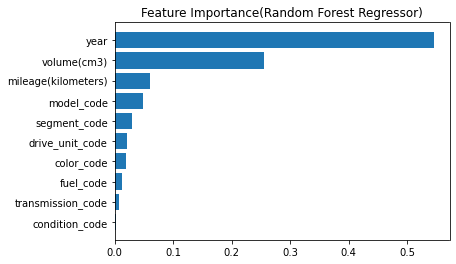

In [277]:
#Bar Chart to identify the most important features
feature_importance = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance(Random Forest Regressor)')

#Gradient Booster Regressor Model

In [278]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=500,learning_rate=0.153).fit(x_train,y_train)


In [279]:
print('Training accuracy score: {}'.format(gbr.score(x_train,y_train)))
print('Testing Accuracy score: {}'.format(gbr.score(x_test,y_test)))
prediction_xgb=gbr.predict(x_test)
#An Gradient Booster regressor model with appropriate parameter tuning reduces overfitting

Training accuracy score: 0.9367690291767361
Testing Accuracy score: 0.8875771752761363


[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


Text(0.5, 1.0, 'Feature Importance(Gradient Booster Regression) ')

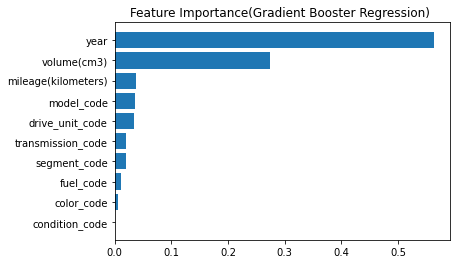

In [280]:
#Bar Chart to identify the most important features
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance(Gradient Booster Regression) ')